# Unit Testing
Unit Testing is where each unit of the system is tested individually. The purpose is to isolate each part of the system to verify that they are working as specified. The use of this type of test throughout the implementation is possible to reduce the amount of bugs in the application. It works by comparing the output of a function to be tested with expected values.

Watch the following 2-min video for a more clear understanding about Unit Testing.

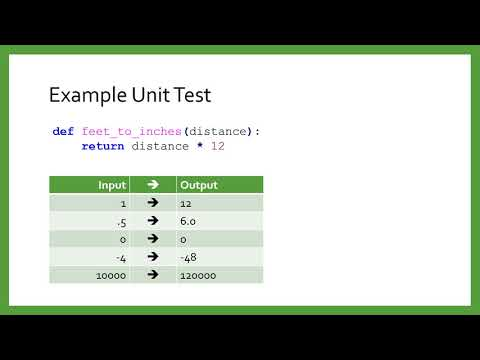

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('upzTwaVNZzs')

## Hands On

<a 
href="https://colab.research.google.com/github/damorimRG/practical_testing_book/blob/master/testgranularity/unittesting.ipynb" target="_blank"> 
<img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"></a>

Following we have a basic calculator class we will be using in this tutorial. You have the option to open it on Google Colab by clicking the button above `Open in Colab` where you can run and modify the code.

The Python's Unit Testing Framework we will be using is called `unittest`, one of the most known frameworks for testing Python code.

In [1]:
import unittest

Our basic calculator has only four basic operations: additon, subtraction, multiplication and division.

In [2]:
class Calculator:
    def __init__(self):
        pass

    def add(self, a, b):
        return a + b

    def sub(self, a, b):
        return a - b
  
    def mul(self, a, b):
        return a * b

    def div(self, a, b):
        if b != 0:
            return a / b

The objective is to ensure each method is working properly and giving the right output when receiving any two inputs.

A test case is created by subclassing `unittest.TestCase`.

In [3]:
class TestCalculator(unittest.TestCase):
  
    def test_add(self):
        '''Test case function for addition'''
        self.calc = Calculator()
        result = self.calc.add(4, 7)
        expected = 11
        self.assertEqual(result, expected)

    def test_sub(self):
        '''Test case function for subtraction'''
        self.calc = Calculator()
        result = self.calc.sub(10, 5)
        expected = 5
        self.assertEqual(result, expected)

    @unittest.skip('Some reason')
    def test_mul(self):
        '''Test case function for multiplication'''
        self.calc = Calculator()
        result = self.calc.mul(3, 7)
        expected = 21
        self.assertEqual(result, expected)

    def test_div(self):
        '''Test case function for division'''
        self.calc = Calculator()
        result = self.calc.div(10, 2)
        expected = 4
        self.assertEqual(result, expected)

We created 4 unit tests, each of it is checking a method of the calculator class. These checks are being done through calls to `Assertions`, in this case the `assertEqual` function. Note that, flagging the method `test_mul` with `@unittest.skip('your_reason')` will skip the test for that method.

To simply run the tests, use:

In [ ]:
unittest.main(argv=[''], verbosity=2, exit=False)

After running you will see something like:

```
test_add (__main__.TestCalculator)
Test case function for addition ... ok
test_div (__main__.TestCalculator)
Test case function for division ... FAIL
test_mul (__main__.TestCalculator)
Test case function for multiplication ... skipped 'Some reason'
test_sub (__main__.TestCalculator)
Test case function for subtraction ... ok
```

Where addition and subtraction passed, multiplication was intentionally skipped, and division failed.

Unittest has several functions, known as `Assertions`, useful for the development of unit tests. Some are: `assertNotEqual(a, b)`, `assertTrue(x)`, `assertFalse(x)`, `assertIs(a, b)`, `assertIsNot(a, b)`, `assertIsNone(x)`, and much more.

## Exception Testing

Likewise the `assert*` functions listed above there is also `assertRaises` function for testing an exception.

Use: `assertRaises(exception, callable, *args, **kwds)`

Where `exception` is the type of exception, `callable` is the method to be tested, and `args` are optional parameters passed to the `callable` method.

Let's change the calculator's division operation for a practical use of `assertRaises`.

In [5]:
class Calculator:
    def __init__(self):
        pass

    def add(self, a, b):
        return a + b

    def sub(self, a, b):
        return a - b
  
    def mul(self, a, b):
        return a * b

    def div(self, a, b):
        if b == 0:
            raise ZeroDivisionError("The divisor must not be zero")
        return a / b

Whenever `div` is called with divisor equals 0 an error raises. Check by running the following test case:

In [ ]:
class TestCalculator(unittest.TestCase):

    def test_div(self):
        '''Make sure ZeroDivisionError is raised when necessary'''
        self.calc = Calculator()
        self.assertRaises(ZeroDivisionError, self.calc.div, 10, 0)

unittest.main(argv=[''], verbosity=2, exit=False)

The test passes because 10 over 0 does raise a `ZeroDivisionError` exception. 

## Organization of Test Cases

The organization of test cases is essential to make them better, more independent and help with their maintenance. For that, there are several standards related to automated tests that can be used in Unit Testing. Some of them are:

### Organizing by Instances

As seen previously, unit test cases are represented by `unittest.TestCase` instances. In other words, we created only one test class holding all the tests of its methods. To a good organization of the test code, it is possible to create different instances meaning each one can hold a bunch of specific tests for a single method.

Let's create another test case for division only.

In [ ]:
class TestCalcDiv(unittest.TestCase):

    def test_div(self):
        '''Test case function for division'''
        self.calc = Calculator()
        self.assertEqual(self.calc.div(10, 5), 2)
        self.assertEqual(self.calc.div(12, 2), 6)

    def test_div_error(self):
        '''Make sure ZeroDivisionError is raised when necessary'''
        self.calc = Calculator()
        self.assertRaises(ZeroDivisionError, self.calc.div, 10, 0)

unittest.main(argv=[''], defaultTest='TestCalcDiv', verbosity=2, exit=False)

The test case above will pass. 

### SetUp() and TearDown()

The setUp and tearDown methods are also useful in organizing test cases. When a `setUp` is defined, the test runner will run that method **prior** to each test. Likewise, if a `tearDown` is defined the test runner will invoke that method **after** each test.

As you might notice we are creating an instance of Calculator `self.calc = Calculator()` in every method to be tested. To avoid repeting code we can simply use the `setUp`function available.

See how our division test case will now look like:

In [ ]:
class TestCalcDiv(unittest.TestCase):

    def setUp(self):
        '''Set up an instance of Calculator pior to every test execution'''
        self.calc = Calculator()

    def test_div(self):
        '''Test case function for division'''
        self.assertEqual(self.calc.div(10, 5), 2)
        self.assertEqual(self.calc.div(12, 2), 6)

    def test_div_error(self):
        '''Make sure ZeroDivisionError is raised when necessary'''
        self.assertRaises(ZeroDivisionError, self.calc.div, 10, 0)

unittest.main(argv=[''], defaultTest='TestCalcDiv', verbosity=2, exit=False)

The test case should pass without problems. You can try creating your own `tearDown` function on Colab.

## Final Consideration

Testing will not catch every error in the program, because it cannot evaluate every execution path in any but the most trivial programs. It cannot prove correctness. This problem is a superset of the halting problem, which is undecidable.

## References

1. [Unit testing framework](https://docs.python.org/3/library/unittest.html)